<a href="https://colab.research.google.com/github/ZoraizQ/Hackathon/blob/master/AgriScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai import basics

In [2]:
 !curl -s https://course.fast.ai/setup/colab | bash

from fastai.vision import *



Updating fastai...
Done.


In [0]:
from zipfile import ZipFile
pathToZip = '/content/drive/My Drive/data2/data.zip'
unzipAt = '/content/drive/My Drive/data2/smolData'

# with ZipFile(pathToZip, 'r') as archive:
#   archive.extractall(unzipAt)

In [0]:
path = Path(unzipAt)
# dest = path/folder
testPath = path/'val'
trainPath = path/'train'
path.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/data2/smolData/data'),
 PosixPath('/content/drive/My Drive/data2/smolData/models'),
 PosixPath('/content/drive/My Drive/data2/smolData/export.onnx'),
 PosixPath('/content/drive/My Drive/data2/smolData/export.pkl')]

In [0]:
tfms = [get_transforms(flip_vert = True), zoom_crop(scale = (0.75,2.0), do_rand = True)]

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=get_transforms(), size=64, num_workers=4).normalize(imagenet_stats)

In [0]:
print(data)

ImageDataBunch;

Train: LabelList (1200 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Tomato___Bacterial_spot,Tomato___Bacterial_spot,Tomato___Bacterial_spot,Tomato___Bacterial_spot,Tomato___Bacterial_spot
Path: /content/drive/My Drive/data2/smolData;

Valid: LabelList (300 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Tomato___Target_Spot,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___healthy,Tomato___healthy,Tomato___Late_blight
Path: /content/drive/My Drive/data2/smolData;

Test: None


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.994832,1.433741,0.483333,00:50
1,2.261311,1.200634,0.353333,00:49
2,1.885367,1.153176,0.363333,00:49
3,1.645796,1.164112,0.346667,00:49


In [0]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.296227,0.993368,0.313333,00:50
1,1.211605,0.990390,0.310000,00:49
2,1.161987,0.988608,0.316667,00:49


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


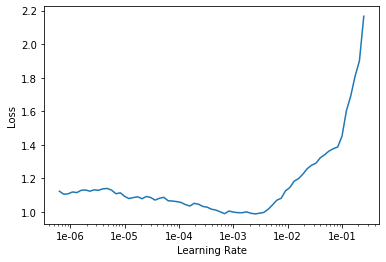

In [0]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-6,3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,1.064350,0.965767,0.320000,01:13
1,1.048795,0.938359,0.303333,01:12


In [0]:
learn.save('stage-2')


In [0]:
learn.load('stage-2')
learn.unfreeze()

In [0]:
learn.lr_find(start_lr=1e-6, end_lr=1e-1)

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

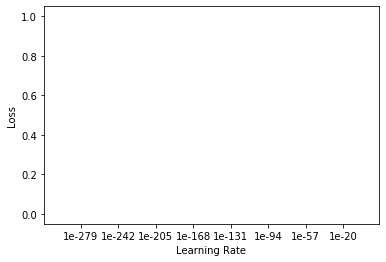

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.213932,10.837430,0.676667,01:16
1,0.949476,0.817171,0.226667,01:17


In [0]:
learn.save('stage-3')


In [0]:
learn.load('stage-3')
learn.unfreeze()

In [0]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


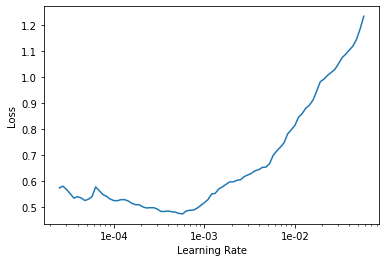

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.755038,3.003523,0.326667,01:15
1,0.657389,0.367861,0.123333,01:15


In [0]:
learn.save('stage-4')


In [0]:
learn.load('stage-4')
learn.unfreeze()

In [0]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


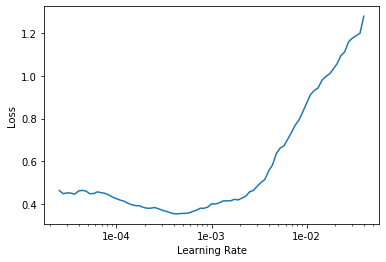

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.520686,0.928665,0.246667,01:13
1,0.509075,0.415565,0.123333,01:13
2,0.406088,0.270730,0.073333,01:13


In [0]:
learn.save('stage-5')


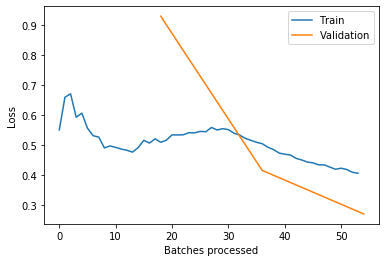

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.export("try.pkl")

In [0]:
learn.load('stage-5')
learn.unfreeze()

In [0]:
learn.lr_find(start_lr=1e-6, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


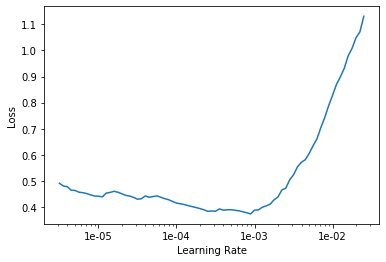

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.496513,0.513833,0.153333,01:14
1,0.546408,0.834306,0.233333,01:14
2,0.467333,0.464048,0.116667,01:15
3,0.364397,0.286464,0.096667,01:14


In [0]:
learn.fit_one_cycle(1, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.289732,0.291552,0.083333,01:14


In [0]:
learn.fit_one_cycle(1, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.206238,0.264341,0.080000,01:14


In [0]:
learn.load("stage-5")
basics.defaults.device = torch.device('cpu')
learn.save("stage-7")

In [0]:
model = learn.model

In [0]:
onnx_output = torch.onnx._export(model, torch_input, MODELS/f'{arch_name}.onnx', verbose=False)

In [0]:
learn.load("stage-5")
learn.model.eval()

x = torch.randn(1, 3, 299, 299, requires_grad=False).cuda()
torch_out = torch.onnx._export(learn.model, x, path/"export.pkl", export_params=True)

In [0]:
torch.save(x, path/"export.onnx")

In [0]:
model = torch.load(path/"export.onnx")

In [0]:
learn = load_learner(path, "try.pkl")

##DEMO with a few Images


###Healthy image

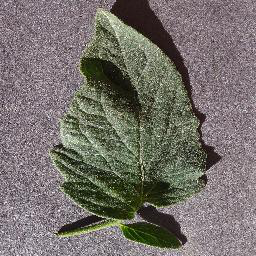

In [16]:
image1 = open_image("/content/drive/My Drive/Data/val/Tomato___healthy/01f98912-9627-4ce0-8f0f-e451b7acbb6c___RS_HL 0509.JPG")
image1

In [8]:
learn.predict(image1)

(Category Tomato___healthy,
 tensor(9),
 tensor([1.7547e-05, 4.3372e-05, 1.0511e-05, 9.4725e-05, 7.0886e-05, 1.3455e-03,
         1.2928e-02, 1.3211e-05, 1.6573e-03, 9.8382e-01]))

###Bacterial spot
 

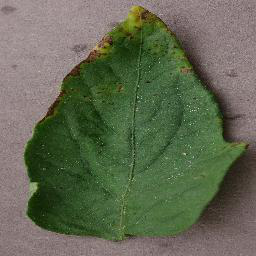

In [15]:
image2 = open_image("/content/drive/My Drive/Data/val/Tomato___Bacterial_spot/d3fddfab-b65c-43e2-bceb-e72ce73f33eb___GCREC_Bact.Sp 3810.JPG")
image2

In [14]:
learn.predict(image2)

(Category Tomato___Bacterial_spot,
 tensor(0),
 tensor([9.9941e-01, 1.0489e-04, 1.1933e-05, 7.9827e-06, 3.5984e-04, 1.5523e-06,
         7.8987e-06, 9.2635e-05, 4.6486e-08, 2.4066e-06]))

###Target spot
 

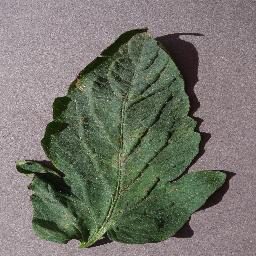

In [19]:
image3 = open_image("/content/drive/My Drive/Data/val/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_TgS_FL 9777.JPG")
image3

In [20]:
learn.predict(image3)

(Category Tomato___Target_Spot,
 tensor(6),
 tensor([3.4390e-05, 1.7609e-04, 2.0888e-05, 1.1238e-05, 2.6584e-05, 8.8381e-04,
         9.9763e-01, 6.6435e-06, 6.9835e-05, 1.1395e-03]))

###Spider Mites
 

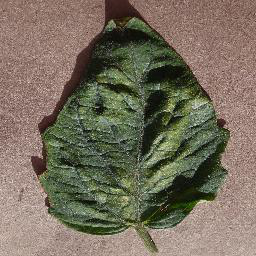

In [21]:
image4 = open_image("/content/drive/My Drive/Data/val/Tomato___Spider_mites Two-spotted_spider_mite/062c5345-1a64-4dba-8c58-0d72902742c1___Com.G_SpM_FL 8874.JPG")
image4

In [22]:
learn.predict(image4)

(Category Tomato___Spider_mites Two-spotted_spider_mite,
 tensor(5),
 tensor([3.7214e-04, 6.8619e-04, 1.2816e-03, 4.5062e-05, 4.3514e-06, 9.2464e-01,
         7.2403e-02, 2.5669e-04, 1.1920e-05, 2.9625e-04]))